### Problem Statement

The data given to us contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [48]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [49]:
# loading the dataset
loan = pd.read_csv('loan.csv')

### Data Cleaning

In [50]:
# Having a look at the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [51]:
# Dataset has 111 attributes including one id and member_id column. 
# Since these columns are not going to influence our analysis hence it is better to get rid of these columns
loan1 = loan.drop(['id','member_id'],axis=1)
loan1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Finding out the more about the dataset
loan1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    loan_amnt                       int64  
 1    funded_amnt                     int64  
 2    funded_amnt_inv                 float64
 3    term                            object 
 4    int_rate                        object 
 5    installment                     float64
 6    grade                           object 
 7    sub_grade                       object 
 8    emp_title                       object 
 9    emp_length                      object 
 10   home_ownership                  object 
 11   annual_inc                      float64
 12   verification_status             object 
 13   issue_d                         object 
 14   loan_status                     object 
 15   pymnt_plan                      object 
 16   url                             object 
 17   desc      

In [53]:
# Dataset has total of 39717 entries
# Performing a preliminary analysis by using reduced set of attributes
# Attributes selected: loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,
# verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,total_acc,application_type,avg_cur_bal
loan_r = loan1[['loan_amnt','funded_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status','dti','pub_rec','revol_bal','revol_util','total_acc','application_type','avg_cur_bal']]


In [54]:
# inspecting the reduced dataset for data types and missing values
loan_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  dti                  39717 non-null  float64
 14  pub_rec              39717 non-null  int64  
 15  revol_bal            39717 non-null 

In [55]:
# column avg_cur_bal has no values. Hencing dropping the same
loan_r.drop(['avg_cur_bal'],axis=1,inplace=True)

In [56]:
# looking for missing values
loan_r.isnull().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
dti                       0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
application_type          0
dtype: int64

In [57]:
loan_r.isnull().sum()/loan_r.shape[0]*100

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
dti                    0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.125891
total_acc              0.000000
application_type       0.000000
dtype: float64

##### Approach with missing values

Column emp_title, emp_length and revol_util contains missing values (6.2%, 2.7& and 0.126% respectively).
The percentages of missing values are not significant and also, we do not have any reliable source to fill them. Hence, we are leaving the missing values as it is.

In [58]:
# looking for incorrect data types
loan_r['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [59]:
loan_r['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [60]:
# correcting the datatype
loan_r['int_rate'] = loan_r['int_rate'].apply(lambda x:float(x[:-1]))

In [61]:
loan_r['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [62]:
# inspecting emp_length column
loan_r['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [63]:
# emp_length is string data type and requires no change

In [64]:
# inspecting the column revol_util
loan_r['revol_util'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
39667 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


Data type of revol_util needs to be changed to float. However, missing values are present in the column and will cause issues while correcting the data type. Since the number of missing values present is much less significant than the total number of entries hence we can drop the rows having these missing values.

In [65]:
# removing missing values from revol_util
loan_r = loan_r[~(loan_r['revol_util'].isnull())]
loan_r.shape

(39667, 19)

In [66]:
loan_r['revol_util'].isnull().sum()

0

In [67]:
# changing the data type to float
loan_r['revol_util'] = loan_r['revol_util'].apply(lambda x:float(x[:-1]))

In [68]:
loan_r['revol_util'].info()

<class 'pandas.core.series.Series'>
Index: 39667 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
39667 non-null  float64
dtypes: float64(1)
memory usage: 619.8 KB


In [69]:
loan_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   term                 39667 non-null  object 
 3   int_rate             39667 non-null  float64
 4   installment          39667 non-null  float64
 5   grade                39667 non-null  object 
 6   sub_grade            39667 non-null  object 
 7   emp_title            37212 non-null  object 
 8   emp_length           38595 non-null  object 
 9   home_ownership       39667 non-null  object 
 10  annual_inc           39667 non-null  float64
 11  verification_status  39667 non-null  object 
 12  loan_status          39667 non-null  object 
 13  dti                  39667 non-null  float64
 14  pub_rec              39667 non-null  int64  
 15  revol_bal            39667 non-null  int6

In [70]:
# Our data is now cleaned and ready for further use

### Outlier Analysis

In [71]:
# Looking for basic summary metrics
loan_r.describe(include='all')

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,total_acc,application_type
count,39667.000000,39667.000000,39667,39667.000000,39667.000000,39667,39667,37212,38595,39667,3.966700e+04,39667,39667,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667
unique,NaN,NaN,2,NaN,NaN,7,35,28781,11,5,NaN,3,3,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,36 months,NaN,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Fully Paid,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL
freq,NaN,NaN,29049,NaN,NaN,12019,2917,134,8878,18867,NaN,16892,32916,NaN,NaN,NaN,NaN,NaN,39667
mean,11227.664053,10955.590919,NaN,12.016587,324.770793,NaN,NaN,NaN,NaN,NaN,6.899952e+04,NaN,NaN,13.318704,0.055084,13398.155394,48.832152,22.103411,NaN
std,7456.610740,7187.135178,NaN,3.723856,208.882852,NaN,NaN,NaN,NaN,NaN,6.378947e+04,NaN,NaN,6.676975,0.237247,15887.036743,28.332634,11.398386,NaN
min,500.000000,500.000000,NaN,5.420000,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,5500.000000,5400.000000,NaN,9.250000,167.080000,NaN,NaN,NaN,NaN,NaN,4.051632e+04,NaN,NaN,8.180000,0.000000,3717.000000,25.400000,14.000000,NaN
50%,10000.000000,9625.000000,NaN,11.830000,280.610000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,13.410000,0.000000,8863.000000,49.300000,20.000000,NaN
75%,15000.000000,15000.000000,NaN,14.540000,430.780000,NaN,NaN,NaN,NaN,NaN,8.240000e+04,NaN,NaN,18.600000,0.000000,17070.000000,72.400000,29.000000,NaN


#### Preliminary Findings from based on basic summary metrics

1. Data pertaining to loan amount,funded amount, int_rate, dti and revol_util do not seem to have abnormally high or low values.
2. Data pertaining to installment, annual_inc, pub_rec and total_acc seem to have some outliers as there is considerable difference between mean and median.
3. Column application_type can be dropped as there is only a single application type
4. Most of the applicants are unverified
5. Most of the applicants fully pay their loans
6. Most of the applicants are from US army
7. Most of the applicants live in rented accomodation

In [72]:
# Dropping application_type
loan_r.drop('application_type', axis=1, inplace=True)

In [73]:
loan_r.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

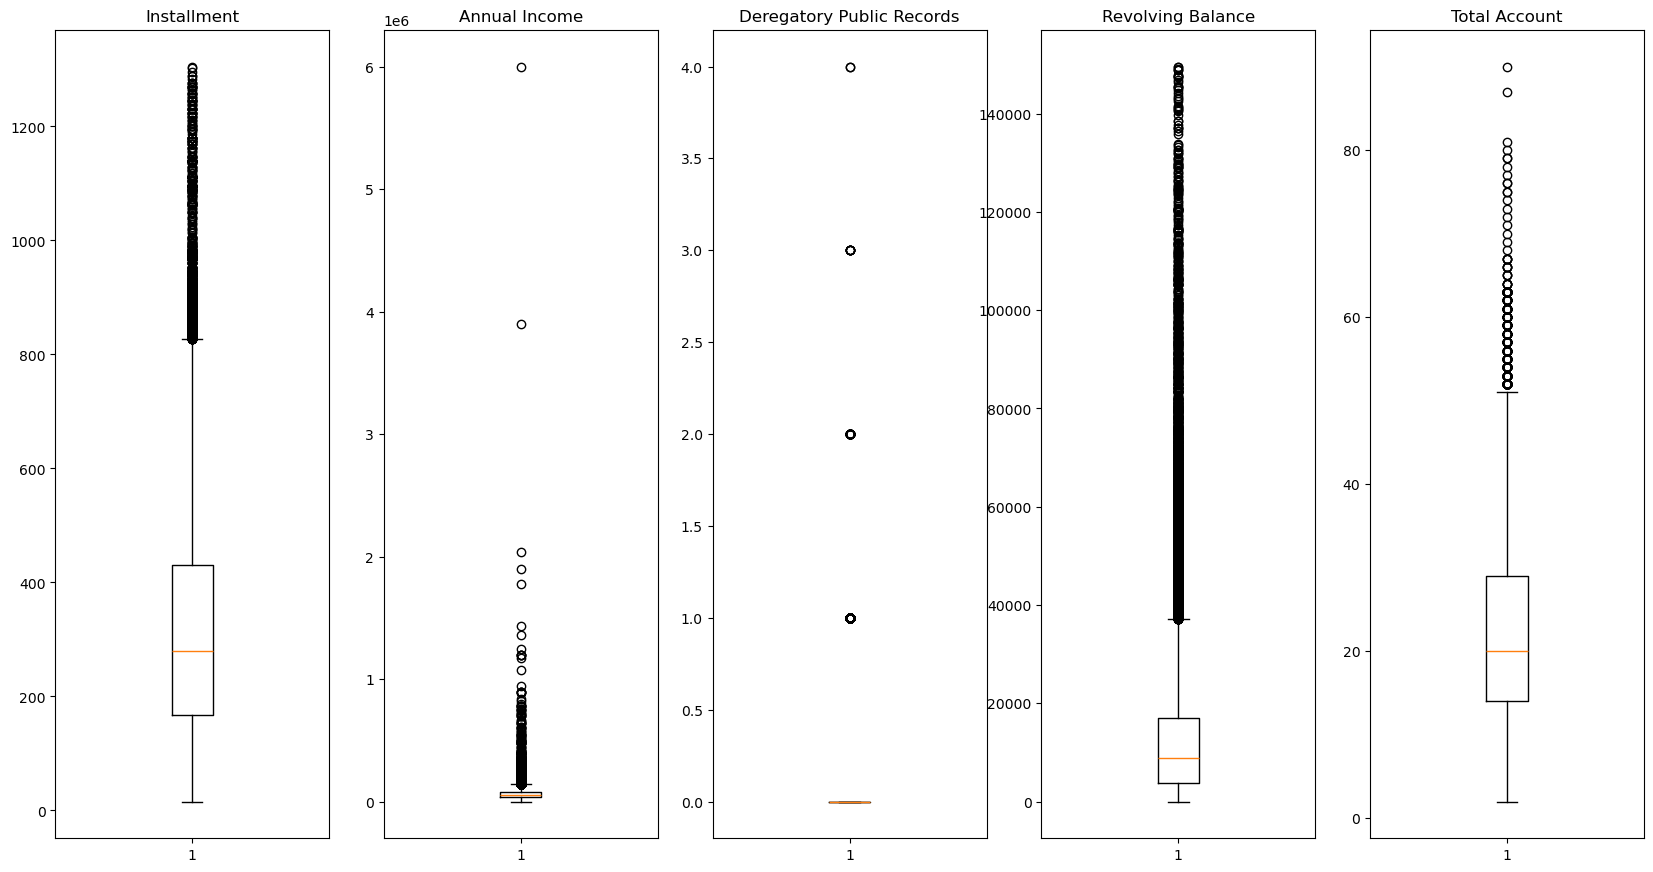

In [92]:
# Inspecting for outliers using boxplot
fig, ax = plt.subplots(ncols=5)
fig.set_size_inches(20.5, 10.5, forward=True)

Installment = ax[0].boxplot(loan_r['installment'])
ax[0].set_title('Installment')

Annual_Income = ax[1].boxplot(loan_r['annual_inc'])
ax[1].set_title('Annual Income')

Pub_Rec = ax[2].boxplot(loan_r['pub_rec'])
ax[2].set_title('Deregatory Public Records')

Revol_bal = ax[3].boxplot(loan_r['revol_bal'])
ax[3].set_title('Revolving Balance')

tot_acc = ax[4].boxplot(loan_r['total_acc'])
ax[4].set_title('Total Account')

plt.show()

In [96]:
# Defining a function for Calculating the number of outliers using interquartile range
def outliers (data,col_name = 'column'):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = data[(data[col_name]<lower_limit)|(data[col_name]>upper_limit)]
    num_outliers = len(outliers)
    percentage = (num_outliers/len(data))*100
    return (num_outliers,percentage)
    

In [97]:
outliers(loan_r,'installment')

(1245, 3.138629087150528)

In [98]:
outliers(loan_r,'annual_inc')

(1842, 4.643658456651624)

In [99]:
outliers(loan_r,'pub_rec')

(2114, 5.329366980109411)

In [100]:
outliers(loan_r,'revol_bal')

(2495, 6.2898631103940295)

In [101]:
outliers(loan_r,'total_acc')

(712, 1.7949428996394987)

In [110]:
# defining a function for removing outliers in a dataset
def remove_outlier (data,col_name='column'):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return data[(data[col_name]>=lower_limit)&(data[col_name]<=upper_limit)]

In [112]:
# Removing outliers and checking the data after each operation
loan_r = remove_outlier(loan_r,'installment')
loan_r['installment'].info()

<class 'pandas.core.series.Series'>
Index: 38422 entries, 0 to 39716
Series name: installment
Non-Null Count  Dtype  
--------------  -----  
38422 non-null  float64
dtypes: float64(1)
memory usage: 600.3 KB


In [113]:
loan_r = remove_outlier(loan_r,'annual_inc')
loan_r['annual_inc'].info()

<class 'pandas.core.series.Series'>
Index: 36723 entries, 0 to 39716
Series name: annual_inc
Non-Null Count  Dtype  
--------------  -----  
36723 non-null  float64
dtypes: float64(1)
memory usage: 573.8 KB


In [114]:
loan_r = remove_outlier(loan_r,'revol_bal')
loan_r['revol_bal'].info()

<class 'pandas.core.series.Series'>
Index: 34713 entries, 0 to 39716
Series name: revol_bal
Non-Null Count  Dtype
--------------  -----
34713 non-null  int64
dtypes: int64(1)
memory usage: 542.4 KB


In [115]:
loan_r = remove_outlier(loan_r,'total_acc')
loan_r['total_acc'].info()

<class 'pandas.core.series.Series'>
Index: 34000 entries, 0 to 39716
Series name: total_acc
Non-Null Count  Dtype
--------------  -----
34000 non-null  int64
dtypes: int64(1)
memory usage: 531.2 KB


In [125]:
# We did not remove outliers from pub_rec as outliers in this column will prove to be useful for identifying defaulters
# Checking all numeric columns for outliers
col_numeric = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'pub_rec', 'revol_bal','revol_util', 'total_acc']
for col in col_numeric:
    print(outliers(loan_r,col))

(477, 1.4029411764705881)
(388, 1.1411764705882352)
(60, 0.17647058823529413)
(609, 1.7911764705882354)
(701, 2.0617647058823527)
(0, 0.0)
(1980, 5.823529411764706)
(605, 1.7794117647058825)
(0, 0.0)
(0, 0.0)


In [126]:
# % of outliers present is not significant. Our dataset is now free of outliers.
# Final dataset
loan_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34000 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34000 non-null  int64  
 1   funded_amnt          34000 non-null  int64  
 2   term                 34000 non-null  object 
 3   int_rate             34000 non-null  float64
 4   installment          34000 non-null  float64
 5   grade                34000 non-null  object 
 6   sub_grade            34000 non-null  object 
 7   emp_title            31929 non-null  object 
 8   emp_length           33027 non-null  object 
 9   home_ownership       34000 non-null  object 
 10  annual_inc           34000 non-null  float64
 11  verification_status  34000 non-null  object 
 12  loan_status          34000 non-null  object 
 13  dti                  34000 non-null  float64
 14  pub_rec              34000 non-null  int64  
 15  revol_bal            34000 non-null  int6

### Univariate Analysis

In [132]:
# Inspecting the target column i.e. loan status
loan_r['loan_status'].value_counts()[1]/len(loan_r)

0.14191176470588235

<Axes: xlabel='loan_status'>

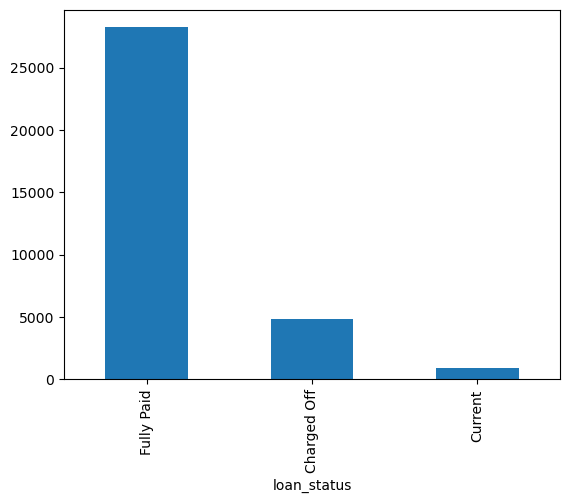

In [134]:
# about 14% of the applicants defaulted in their loans
loan_r['loan_status'].value_counts().plot.bar()

<Axes: xlabel='loan_amnt', ylabel='Density'>

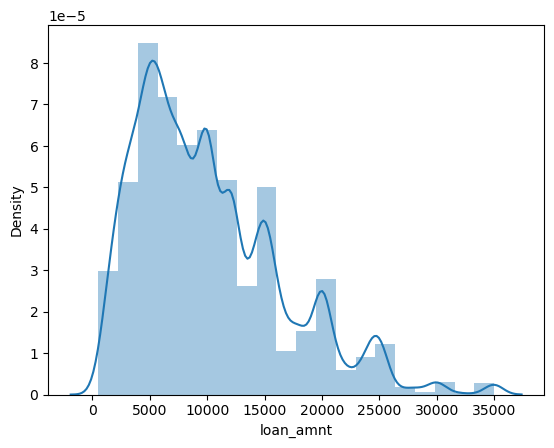

In [137]:
# Inspecting the distribution of loan_amount
sns.distplot(loan_r['loan_amnt'],bins=20)

<Axes: xlabel='int_rate', ylabel='Density'>

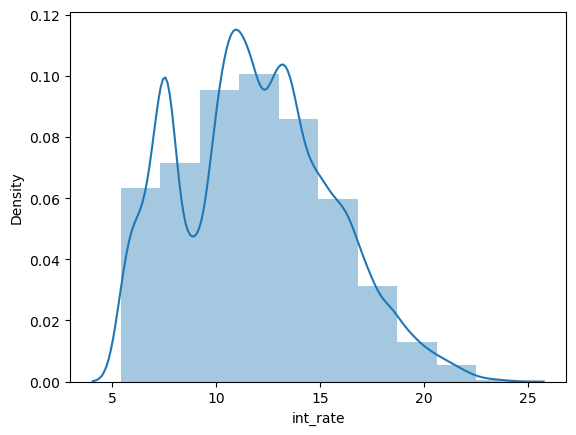

In [142]:
# Majority of the loans are skewed between 5000 to 10000 dollars
# Checking the distribution of int_rates
sns.distplot(loan_r['int_rate'],bins=10)

<Axes: >

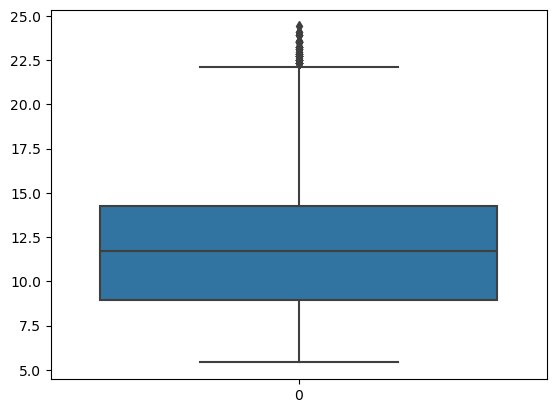

In [140]:
sns.boxplot(loan_r['int_rate'])

<Axes: xlabel='installment', ylabel='Density'>

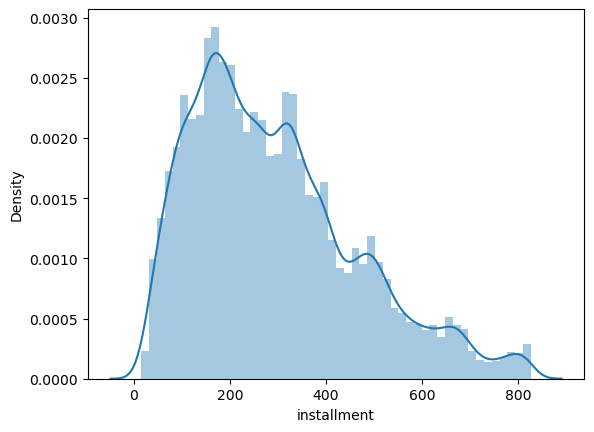

In [144]:
# Interest rates are mostly clustered between 10 to 15% with median interest rate being near to 12%
# Checking the distribution of installments
sns.distplot(loan_r['installment'])

<Axes: >

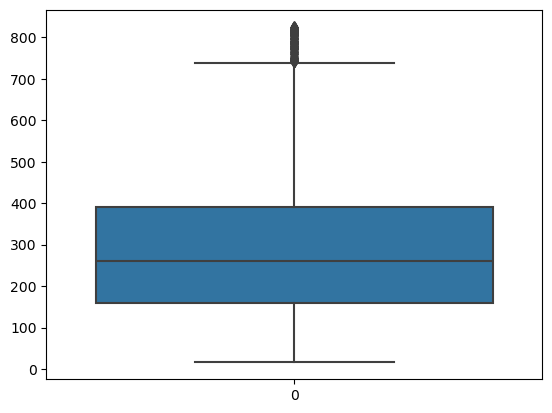

In [145]:
sns.boxplot(loan_r['installment'])

<Axes: xlabel='annual_inc', ylabel='Density'>

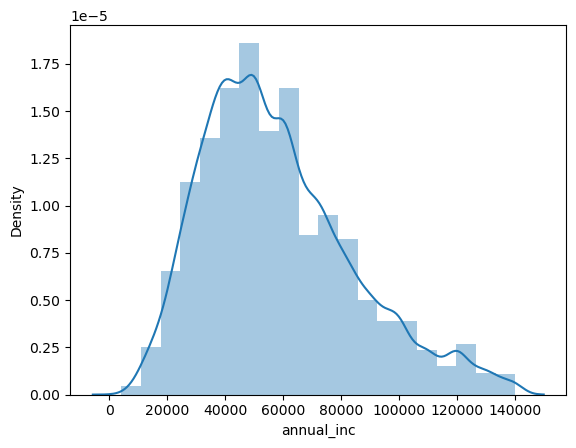

In [147]:
# Checking the distribution of annual income
sns.distplot(loan_r['annual_inc'],bins=20)

<Axes: >

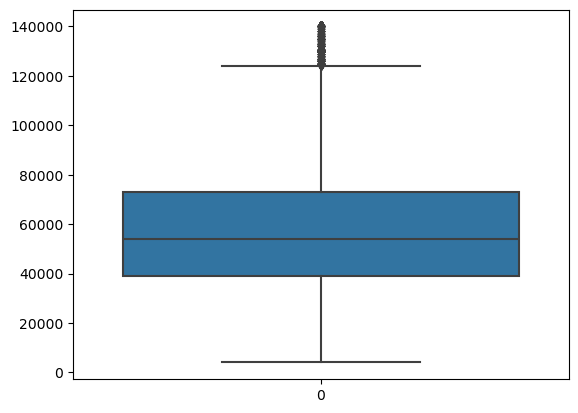

In [148]:
sns.boxplot(loan_r['annual_inc'])

<Axes: xlabel='dti', ylabel='Density'>

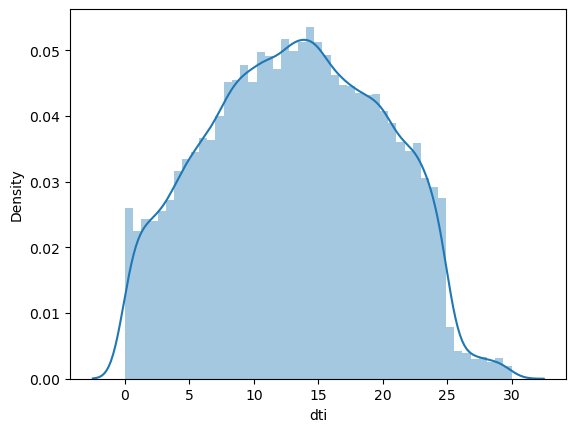

In [149]:
# Checking the distribution of dti 
sns.distplot(loan_r['dti'])

<Axes: >

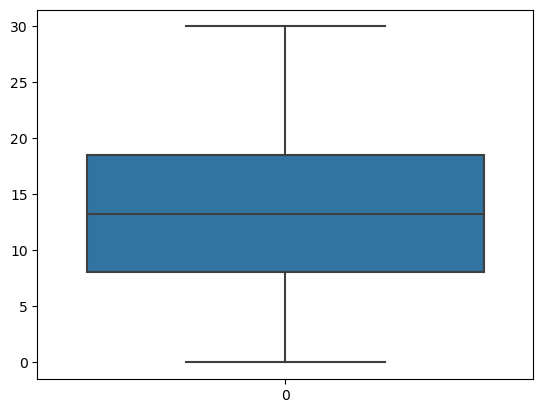

In [150]:
sns.boxplot(loan_r['dti'])

In [174]:
loan_r['dti'].describe()

count    34000.000000
mean        13.208549
std          6.674102
min          0.000000
25%          8.060000
50%         13.280000
75%         18.480000
max         29.990000
Name: dti, dtype: float64

In [151]:
# Distribution of loan_amnt, int_rate, installment, annual_inc are showing similar characteristics with the distribution being a bit left skewed
# Median for dti is near about 14 and most of the values are in between 7 to 19. 
# This indicates that almost all of the borrowers have total monthly debt payments much higher than their self declared monthly income.
# If this would have been true then most of the borrowers would have defaulted in their paymnets but that is not the case
# This might indicate borrowers have reported highly deflated monthly income figures

<Axes: xlabel='pub_rec', ylabel='Density'>

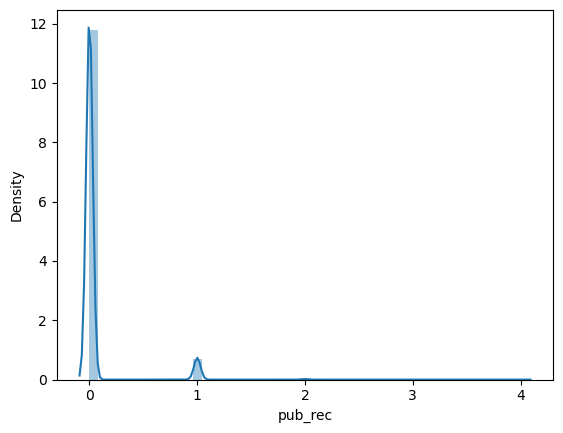

In [157]:
# Inspecting the pub_rec column
sns.distplot(loan_r['pub_rec'])

In [ ]:
# Very few applicant have derogatory public records

In [ ]:
# Inspecting the revol_bal column

<Axes: xlabel='revol_bal', ylabel='Density'>

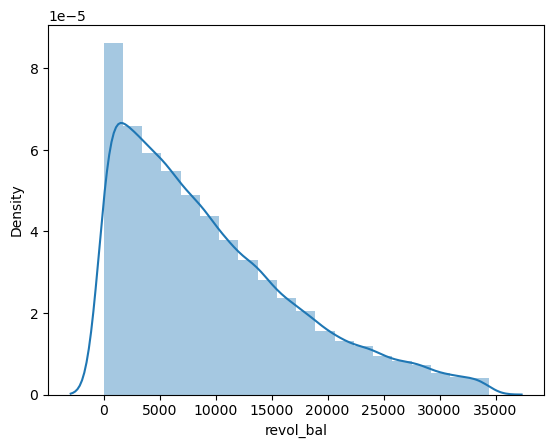

In [176]:
sns.distplot(loan_r['revol_bal'],bins=20)

<Axes: >

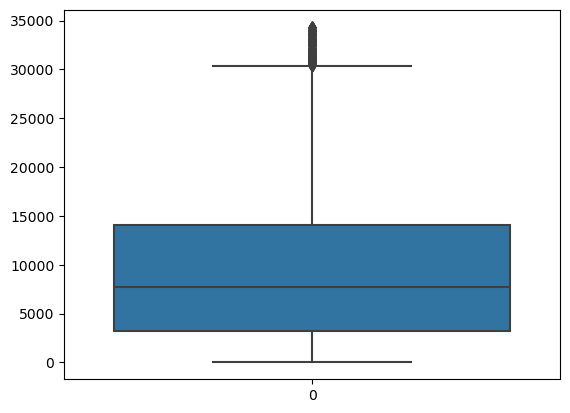

In [178]:
sns.boxplot(loan_r['revol_bal'])

In [179]:
loan_r['revol_bal'].describe()

count    34000.000000
mean      9597.683853
std       7878.396782
min          0.000000
25%       3270.000000
50%       7708.000000
75%      14105.250000
max      34392.000000
Name: revol_bal, dtype: float64

In [ ]:
# There is wide variation in revol_bal values with the distribution being skewed towards lower values. This shows that most borrowers are not relying
# too much on credit

<Axes: xlabel='revol_util', ylabel='Density'>

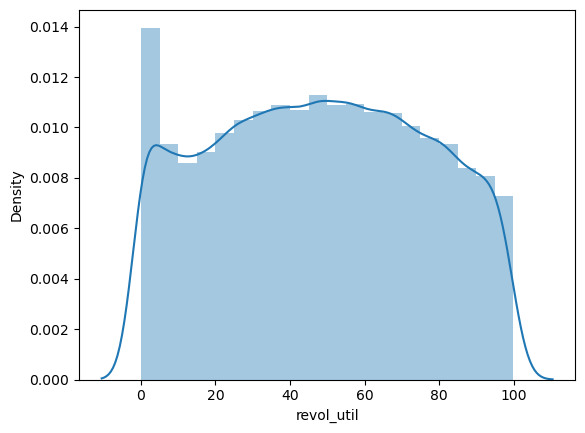

In [183]:
# inspecting revol_util
sns.distplot(loan_r['revol_util'],bins=20)


<Axes: >

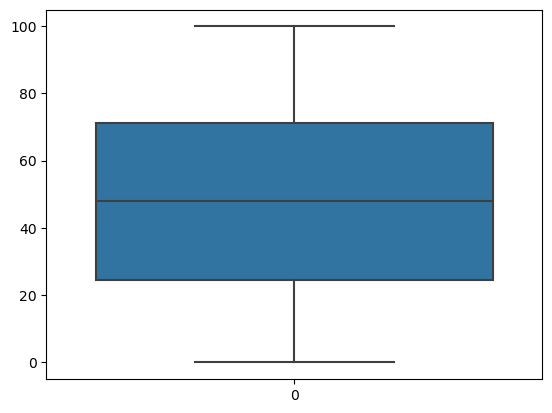

In [182]:
sns.boxplot(loan_r['revol_util'])

In [186]:
loan_r.revol_util.describe()

count    34000.000000
mean        47.978475
std         28.232322
min          0.000000
25%         24.645000
50%         48.100000
75%         71.200000
max         99.900000
Name: revol_util, dtype: float64

In [ ]:
# The average revolving credit utilization is 47%

In [ ]:
# Inspecting the total_acc column

In [187]:
loan_r.total_acc.describe()

count    34000.000000
mean        20.347294
std          9.887046
min          2.000000
25%         13.000000
50%         19.000000
75%         27.000000
max         48.000000
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='Density'>

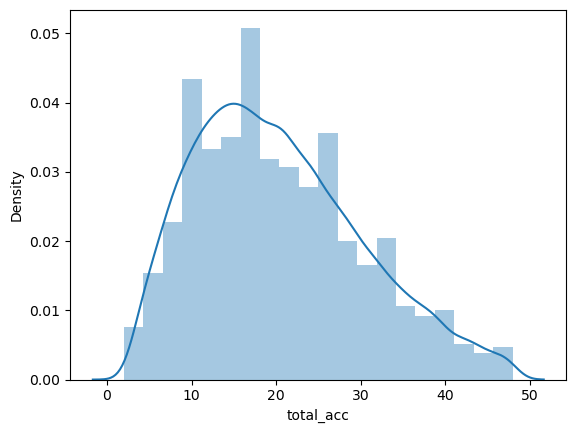

In [189]:
sns.distplot(loan_r.total_acc,bins=20)

<Axes: >

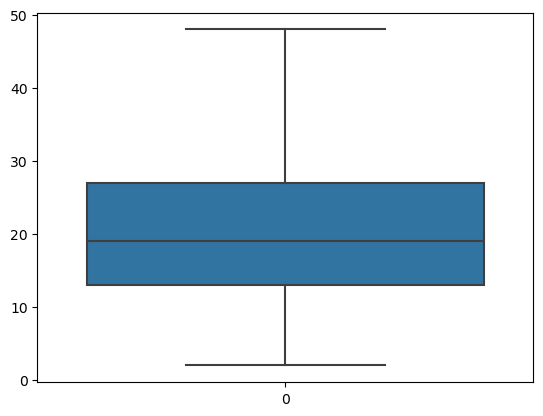

In [190]:
sns.boxplot(loan_r.total_acc)

In [ ]:
# Most of the borrowers are having about 13 to 27 credit lines

<Axes: xlabel='term'>

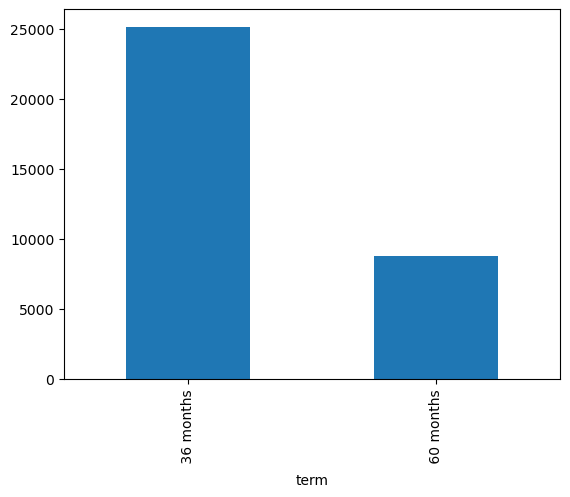

In [152]:
# Inspecting the term column 
loan_r['term'].value_counts().plot.bar()

<Axes: xlabel='grade'>

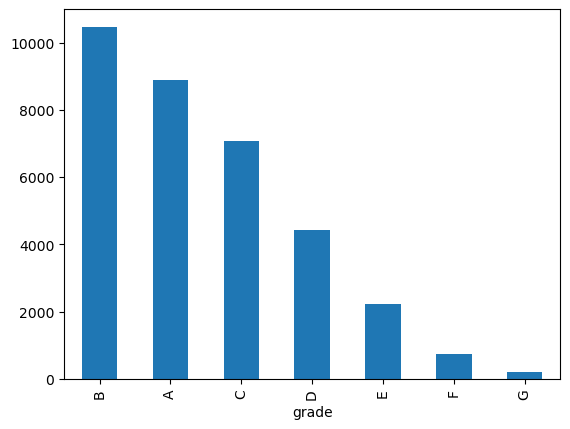

In [153]:
# Most of the loans are having a term of 36 months
# Inspecting the grade and sub_grade column
loan_r['grade'].value_counts().plot.bar()

<Axes: xlabel='sub_grade'>

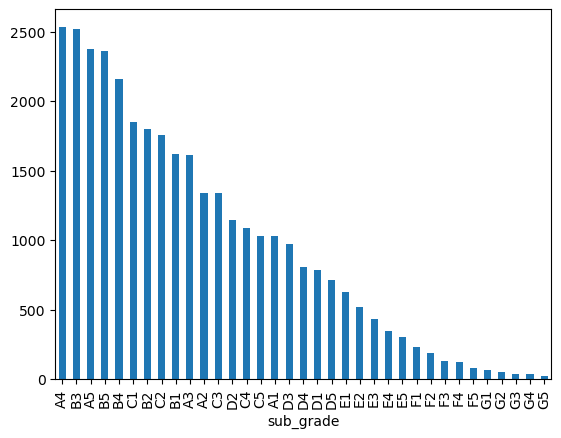

In [156]:
loan_r['sub_grade'].value_counts().plot.bar()

In [165]:
# Most of the loans are graded B but A3 is the most frequent subgrade amongst all.
# Inspecting emp_title and emp_length
loan_r['emp_title'].value_counts()

emp_title
US Army                 120
Bank of America          95
AT&T                     53
Wells Fargo              48
USAF                     47
                       ... 
Ez Prints Inc             1
abc supply                1
Grove Networks, Inc.      1
Bolder Inc                1
Evergreen Center          1
Name: count, Length: 25219, dtype: int64

<Axes: xlabel='emp_title'>

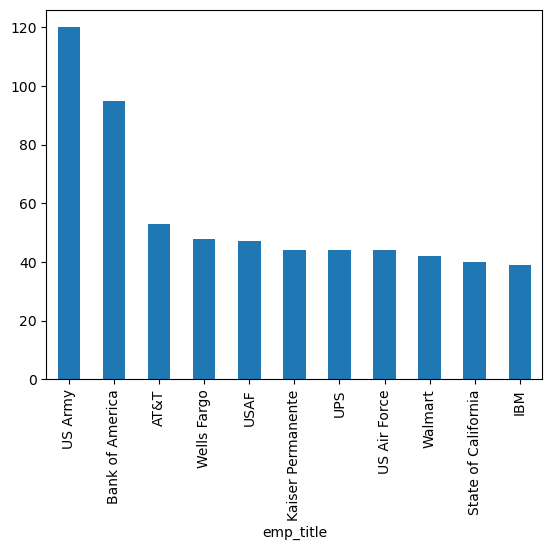

In [166]:
loan_r['emp_title'].value_counts()[:11].plot.bar()

<Axes: ylabel='count'>

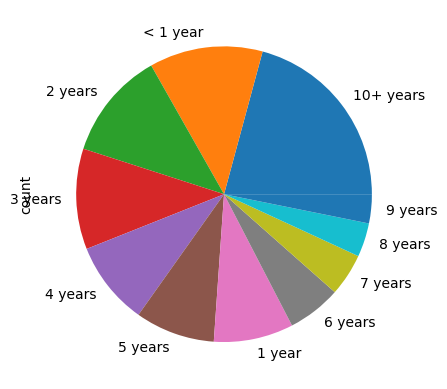

In [168]:
loan_r['emp_length'].value_counts().plot.pie()

In [ ]:
# Most of the applicants belong to US Army with Bank of America being the second. Majority of applicants are having 10+ years of working experience

<Axes: ylabel='count'>

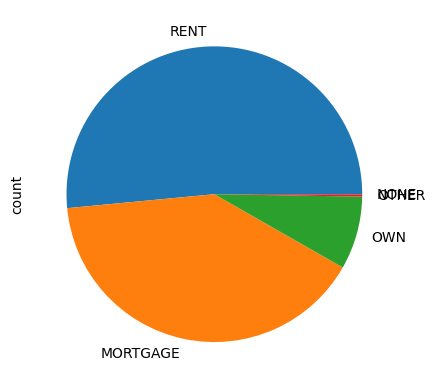

In [169]:
# Inspecting the home ownership column
loan_r['home_ownership'].value_counts().plot.pie()

In [170]:
# More than half of the applicants have rented accomodation and a significant fraction have a mortgage. Also, very few people owning a home.

<Axes: ylabel='count'>

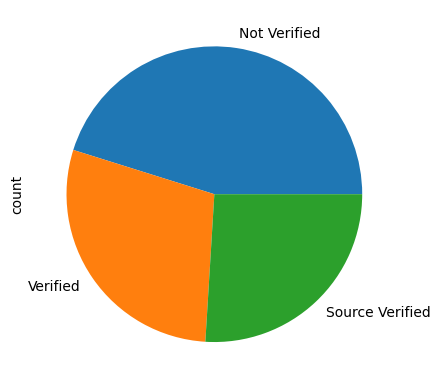

In [171]:
# Inspecting the verification_status
loan_r['verification_status'].value_counts().plot.pie()

In [173]:
loan_r['verification_status'].value_counts()/len(loan_r)*100

verification_status
Not Verified       45.161765
Verified           28.867647
Source Verified    25.970588
Name: count, dtype: float64

In [ ]:
# 45% of applicants are unverified. If we club unverified and source verified applicants together then we get about 70% applicants whose income
# is questionable. This very well resonates with the abnormally high dti ratio.

#### Major Findings of Univariate Analysis

1. About 14% of the applicants defaulted in their loans.
2. Majority of the loans are skewed between 5000 to 10000 dollars.
3. Distribution of loan_amnt, int_rate, installment, annual_inc are showing similar characteristics with the distribution being a bit left skewed
4. Median for dti is near about 14 and most of the values are in between 7 to 19. This indicates that almost all of the borrowers have total monthly debt payments much higher than their self declared monthly income. If this would have been true then most of the borrowers would have defaulted in their paymnets but that is not the case. This might indicate borrowers have reported highly deflated monthly income figures.
5. The above point is further supported by significant fraction of applicant's income being unverified. 45% of applicant's income is unverified. If we club unverified and source verified applicants together then we get about 70% applicants whose income is questionable. This very well resonates with the abnormally high dti ratio.
6. Very few applicant have derogatory public records.
7. There is wide variation in revol_bal values with the distribution being skewed towards lower values. This shows that most borrowers are not relying too much on credit.  The average revolving credit utilization is 47. . The distribution of total accounts is a bit left screwed indicating that borrowers are not overly relying on credit. Most of the borrowers are having about 13 to 27 credit line
8. Most of the debts are short term debts having a term of 36 months.
9.  Most of the loans are graded B but A3 is the most frequent subgrade amongst all
10. . Most of the applicants belong to US Army with Bank of America being the second. Majority of applicants are having 10+ years of working experienc
11. 3. More than half of the applicants have rented accomodation and a significant fraction have a mortgage. Also, very few people are owning a home.s.


## Bivariate Analysis

We will start with the bivariate analysis centering around our target column i.e. the loan status and try to find out how different attributes are affecting the status of loans taken by all the applicants

In [191]:
# Taking a breif glance at the data summary again
loan_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34000 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34000 non-null  int64  
 1   funded_amnt          34000 non-null  int64  
 2   term                 34000 non-null  object 
 3   int_rate             34000 non-null  float64
 4   installment          34000 non-null  float64
 5   grade                34000 non-null  object 
 6   sub_grade            34000 non-null  object 
 7   emp_title            31929 non-null  object 
 8   emp_length           33027 non-null  object 
 9   home_ownership       34000 non-null  object 
 10  annual_inc           34000 non-null  float64
 11  verification_status  34000 non-null  object 
 12  loan_status          34000 non-null  object 
 13  dti                  34000 non-null  float64
 14  pub_rec              34000 non-null  int64  
 15  revol_bal            34000 non-null  int6

We have two different kinds of attribute columns - numeric and categorical. For bivariate analysis of numeric columns we will be using boxplots and for categorical columns we will be using stacked bar plots.

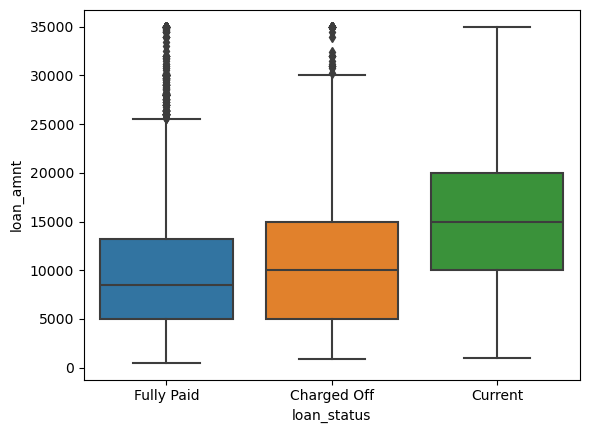

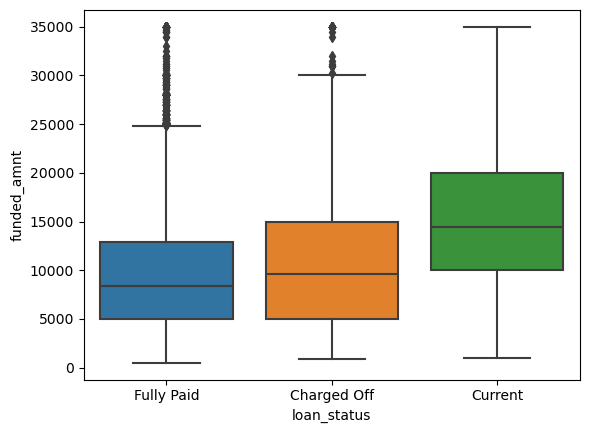

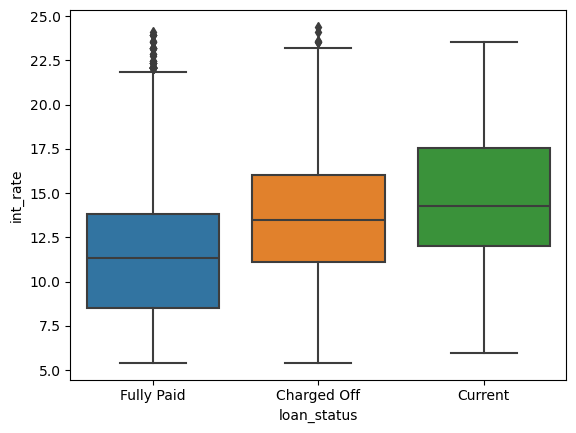

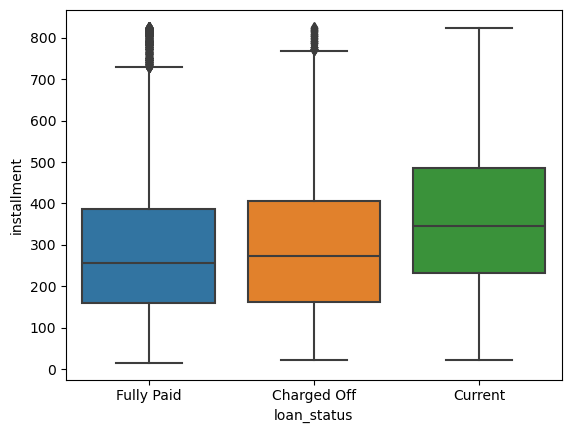

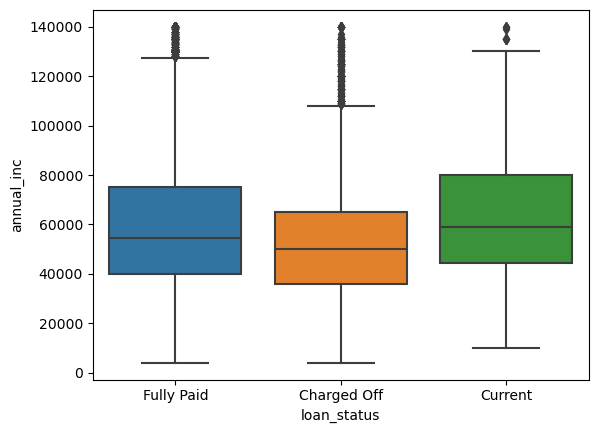

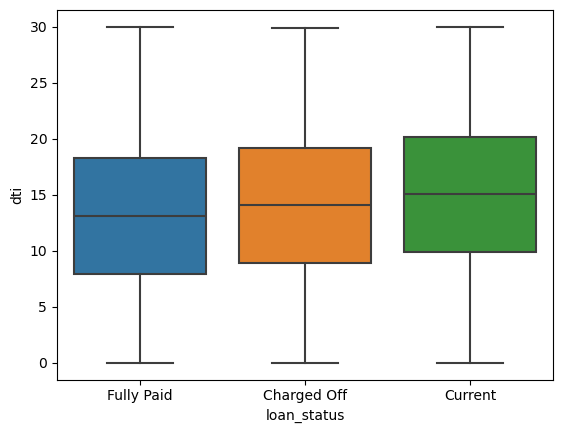

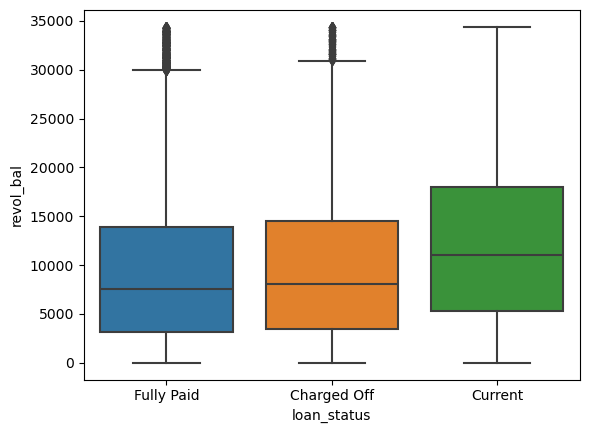

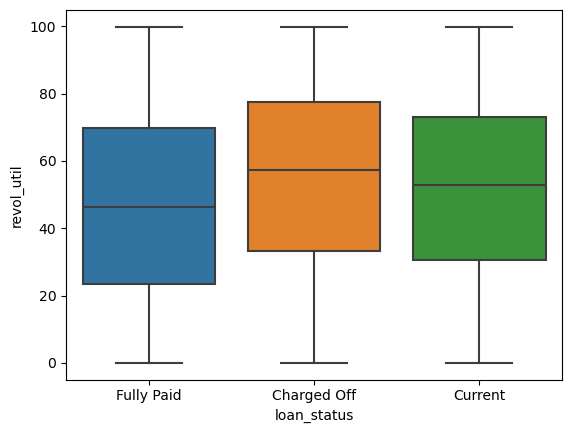

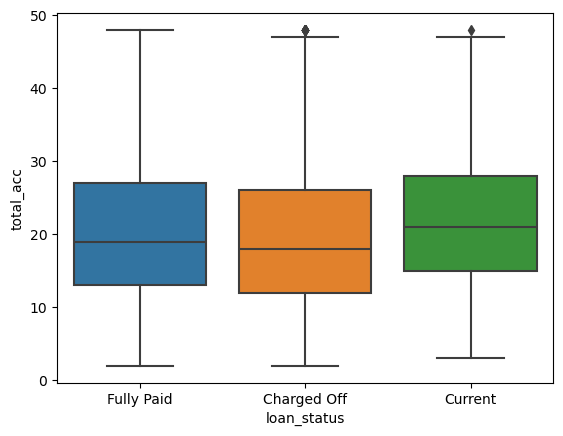

In [196]:
# Bivariate analysis of numeric columns
# Defining the numeric column list
num_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'revol_bal','revol_util', 'total_acc']
for col in num_cols:
    sns.boxplot(x=loan_r['loan_status'],y=loan_r[col])
    plt.show()

#### Findings from Numeric Bivariate


1. Loan amounst of defaulted applicants is slightly higher than fully paid applicants. Current applicants are having the highest loan amount
2. Interest rate of defaulted applicants is significantly greater than fully paid ones. We will find out why the defaulted applicants were charged a higher interest rate and study the risk factors involved.
3. Defaulters had a significantly less annual income than the others
4. DTI is quiet high for all the three categories
5. Defaulters have a higher revolving balance utilization indicating their higher reliance on credit

#### Categorical Bivariate

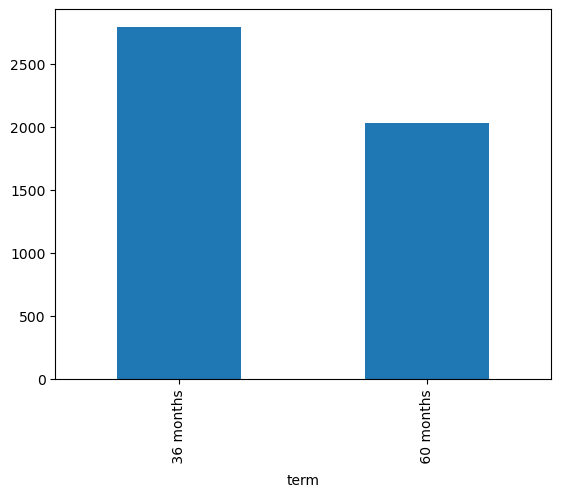

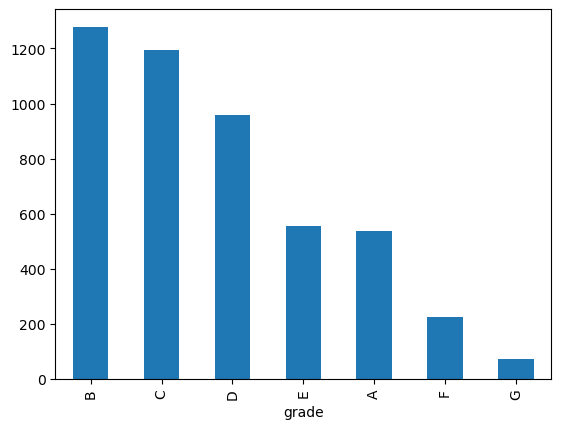

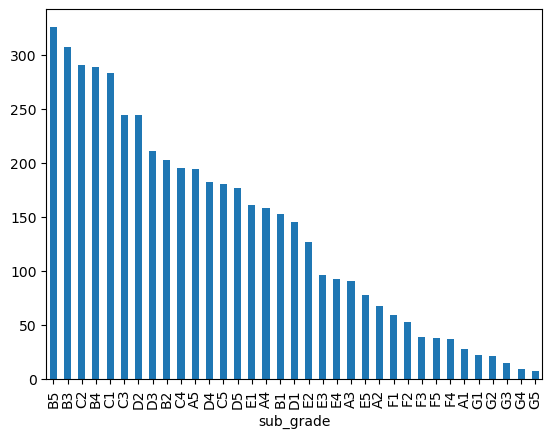

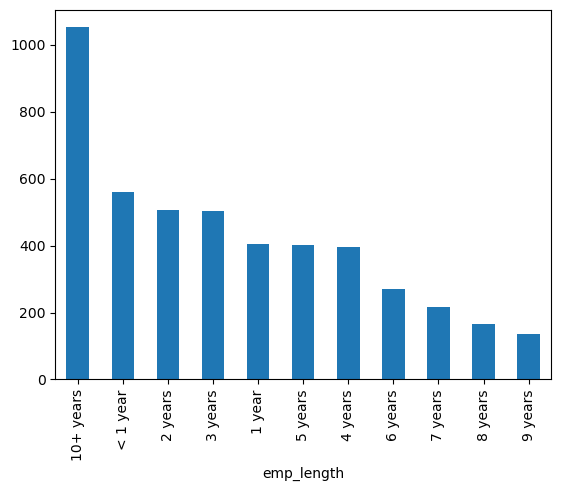

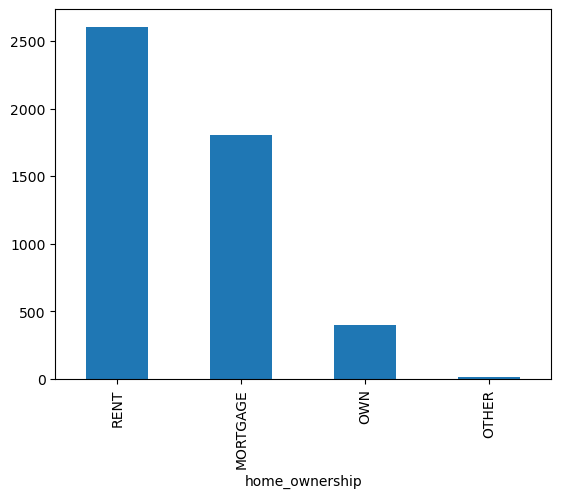

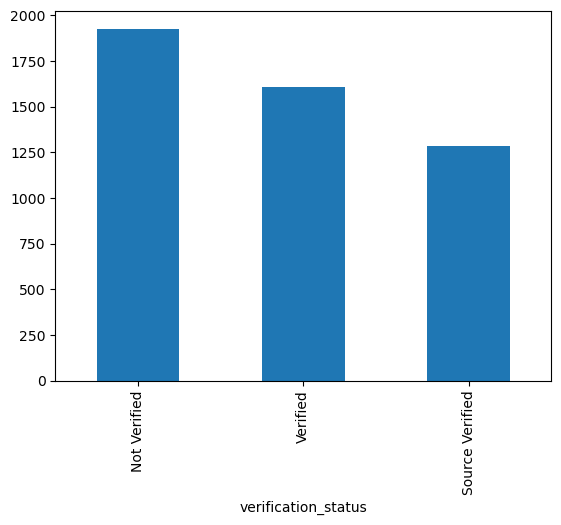

In [217]:
# Defining the categorical columns excluding employment title
cat_cols = ['term', 'grade','sub_grade', 'emp_length', 'home_ownership','verification_status']
for col in cat_cols:
    loan_r[loan_r.loan_status=='Charged Off'][col].value_counts().plot.bar()
    plt.show()

<Axes: xlabel='emp_title'>

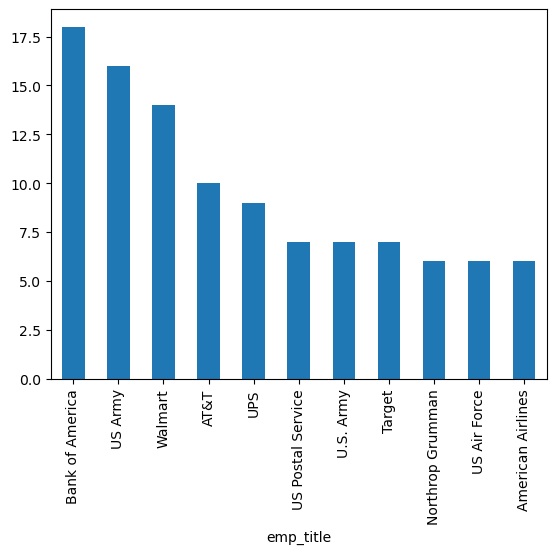

In [206]:
# Bivariate analysis of top 10 types of applicants based on employment
loan_r['emp_title'][loan_r.loan_status == 'Charged Off'].value_counts()[:11].plot.bar()

#### Findings from categorical bivariate
1. Applicants with 36 months term default more than 60 months
2. Applicants with B grade (subcategory B5) loans default most
3. Applicants with 10+ year experience default more than others
4. Applicants having rented accommodation default most
5. Unverified applicants have a higher default frequency
6. Amongst top 10 employment types, employees of Bank of America default most followed by applicants of U

However, it is pertinent to mention here that we have the highest applicants from the above mentioned categories as well. So, it cannot be generalized that the above factors are indicators of defaulters.S Army


Next we try to understand how annual income is related to an applicant being defaulting in loan repayment

In [237]:
# Categorizing the data based on annual_inc
bins = [4000, 25000, 40000, 60000, 85000, 100000, 120000, 140000]
labels = ['very very low','very low','low','middle','high','very high','very very high']

loan_r['income_group'] = pd.cut(loan_r['annual_inc'],bins=bins,labels=labels,right=False)
loan_r['income_group'].value_counts()

income_group
low               10572
middle             9119
very low           6603
high               2541
very very low      2298
very high          1729
very very high     1036
Name: count, dtype: int64

<Axes: xlabel='income_group'>

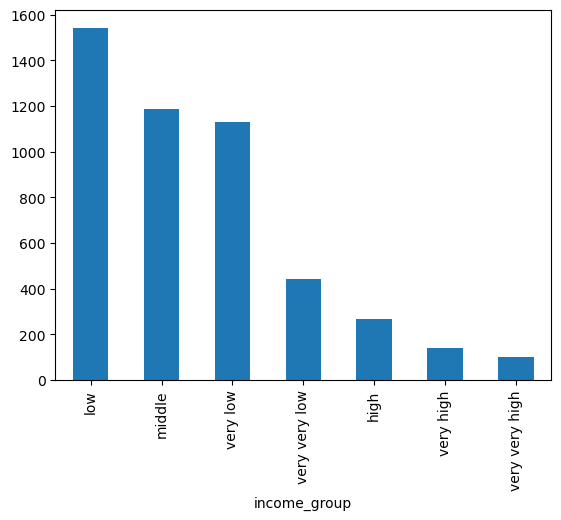

In [238]:
# Most of the applicants are from low income and middle income groups
# Analyzing income group w.r.t. defaulters

loan_r[loan_r.loan_status == 'Charged Off']['income_group'].value_counts().plot.bar()

<Axes: xlabel='income_group', ylabel='int_rate'>

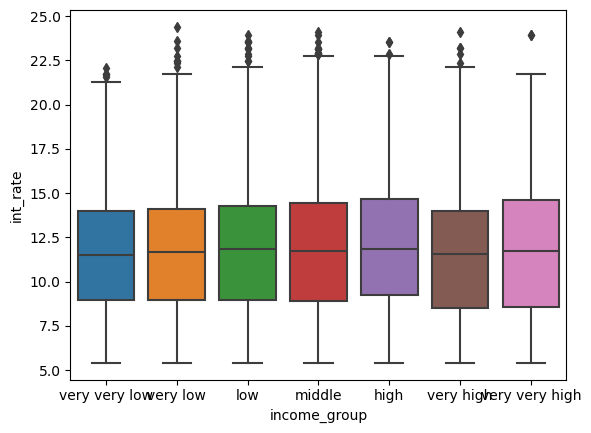

In [239]:
# Most of applicants who defaulted are also from low and middle income groups
# Analyzing income group w.r.t. interest rates
sns.boxplot(x='income_group',y='int_rate',data=loan_r)

It is evident that most of the applicants from low (40000 t0 60000 dollars) and middle (60000 to 80000 dollars) and consequently they default the most. These applicants are levied similar interest rates as others.

Next we are going to analyse loan_amount with respect to defaults in loan repayments.

In [240]:
# Categorizing data based on loan_amnt
bins_loan = [500,5000,10000,15000,20000,25000,30000,35000]
labels_loan = ['very very low','very low','low','medium','high','very high','very very high']

loan_r['loan_amnt_cat'] = pd.cut(loan_r['loan_amnt'],bins=bins_loan,labels=labels_loan,right=False)
loan_r['loan_amnt_cat'].value_counts()

loan_amnt_cat
very low          11142
low                7972
very very low      7084
medium             4130
high               2446
very high           859
very very high      217
Name: count, dtype: int64

<Axes: xlabel='loan_amnt_cat'>

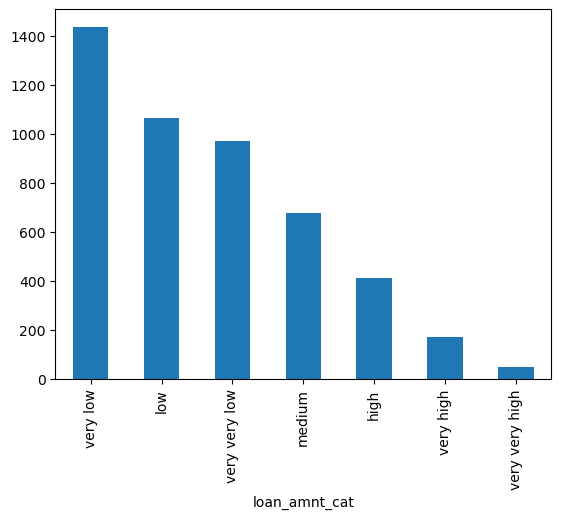

In [241]:
loan_r[loan_r.loan_status == 'Charged Off']['loan_amnt_cat'].value_counts().plot.bar()

<Axes: xlabel='loan_amnt_cat', ylabel='int_rate'>

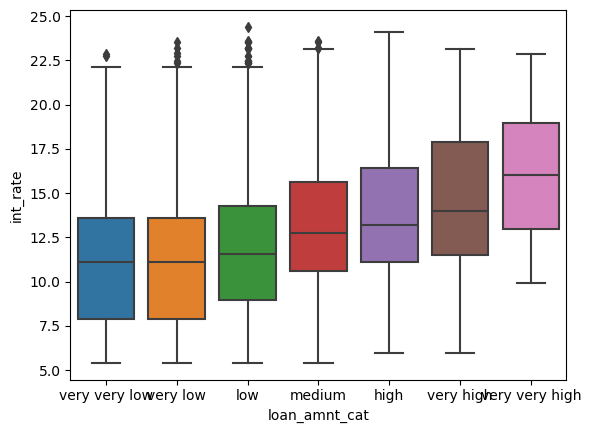

In [242]:
sns.boxplot(x='loan_amnt_cat',y='int_rate',data=loan_r)

Most of the loans are very low(5000 to10000 dollars) or low value (10000 to 15000 dollars) loans. Interest rate charged is comensurate with the loan amount.

<Axes: xlabel='loan_amnt_cat'>

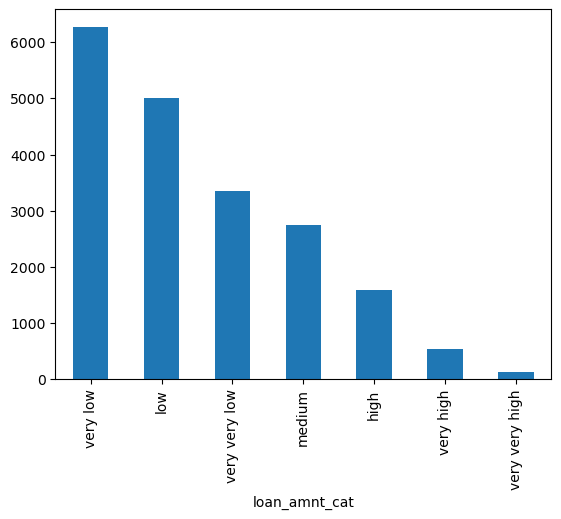

In [248]:
# Analyzing distribution of loan amounts in low and middle income groups
loan_r[(loan_r['income_group']=='low') | (loan_r.income_group=='middle')]['loan_amnt_cat'].value_counts().plot.bar()

Majority of applicants who defaulted has very low or low loan amounts. The interest levied is showing an increasing trend with loan amount which is generally the case.

<Axes: xlabel='term', ylabel='int_rate'>

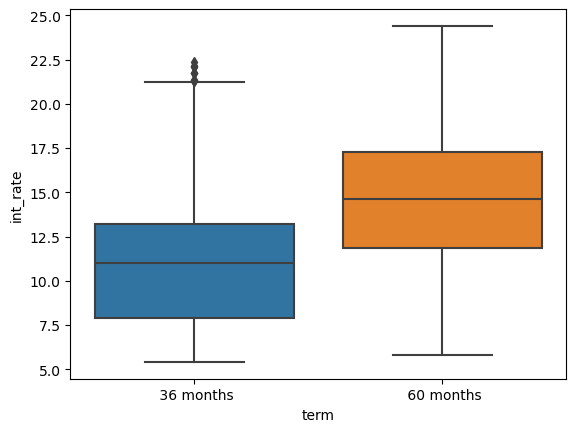

In [262]:
# analyzing the distribution of interest rates with other categorical variables
sns.boxplot(x='term',y='int_rate',data=loan_r)

<Axes: xlabel='emp_title', ylabel='int_rate'>

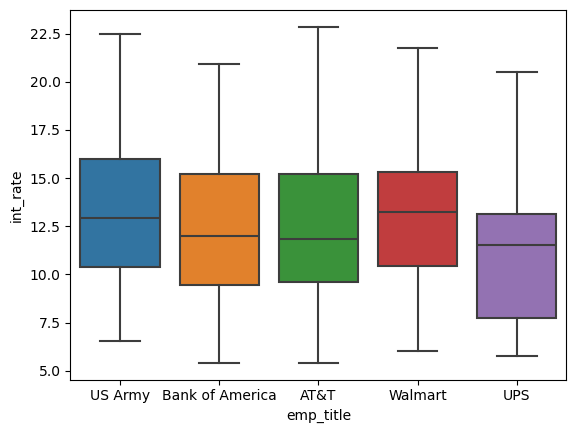

In [273]:
sns.boxplot(x='emp_title',y='int_rate',data = loan_r[loan_r['emp_title'].isin(['Bank of America','US Army','Walmart','AT&T','UPS'])])

<Axes: xlabel='verification_status', ylabel='int_rate'>

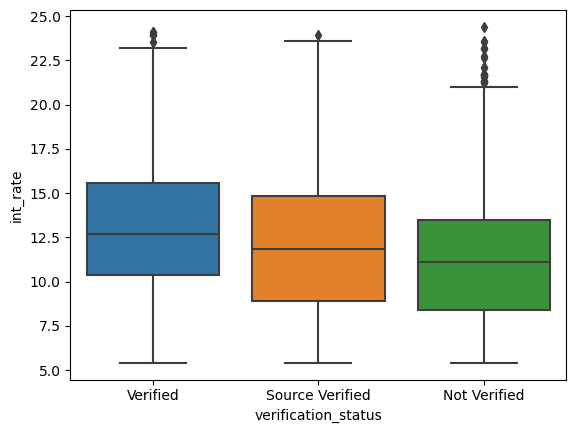

In [276]:
sns.boxplot(x='verification_status',y='int_rate',data=loan_r)

<Axes: xlabel='emp_length', ylabel='int_rate'>

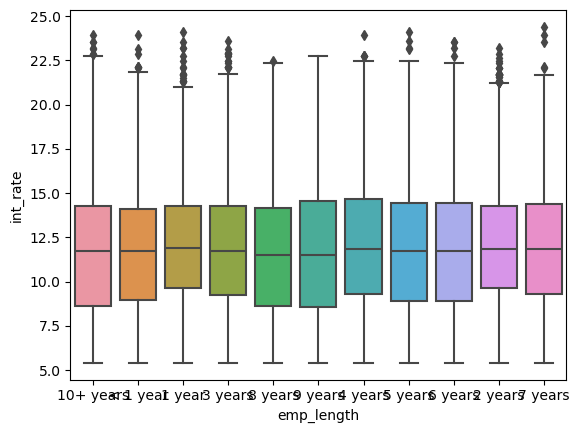

In [277]:
sns.boxplot(x='emp_length',y='int_rate',data=loan_r)

<Axes: xlabel='home_ownership', ylabel='int_rate'>

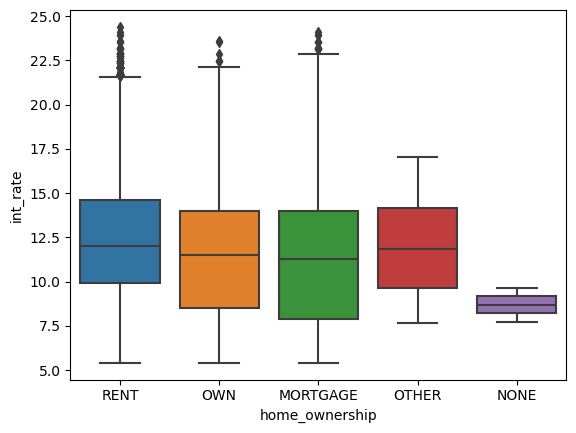

In [278]:
sns.boxplot(x='home_ownership',y='int_rate',data=loan_r)

1. 36 month loan is charged a higher interest rate than 60 month loan. Short term loans are levied higher interest rates as compared to long term ones.
2. Employees of US Army are charged a higher interest rate as compared to others
3. Verified candidates are charged the highest interest rates and unverified the least
4. There is no variation in interest rates w.r.t. employment length
5. There is not much variation in interest rates w.r.t. home ownership

### Multivariate Analysis

In [280]:
# Considering only numerical columns
loan_num = loan_r[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'revol_bal','revol_util', 'total_acc']]
corr_matrix = loan_num.corr()

In [281]:
corr_matrix

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc
loan_amnt,1.000000,0.979909,0.258422,0.923224,0.364902,0.077020,0.363813,0.049041,0.232446
funded_amnt,0.979909,1.000000,0.262680,0.950960,0.360630,0.078060,0.360612,0.053912,0.227385
int_rate,0.258422,0.262680,1.000000,0.231139,0.022736,0.103958,0.122315,0.472465,-0.097587
installment,0.923224,0.950960,0.231139,1.000000,0.359735,0.067261,0.364691,0.084762,0.202623
annual_inc,0.364902,0.360630,0.022736,0.359735,1.000000,-0.124917,0.308935,0.005664,0.360919
dti,0.077020,0.078060,0.103958,0.067261,-0.124917,1.000000,0.322638,0.265222,0.236020
revol_bal,0.363813,0.360612,0.122315,0.364691,0.308935,0.322638,1.000000,0.438106,0.315222
revol_util,0.049041,0.053912,0.472465,0.084762,0.005664,0.265222,0.438106,1.000000,-0.092452
total_acc,0.232446,0.227385,-0.097587,0.202623,0.360919,0.236020,0.315222,-0.092452,1.000000


<Axes: >

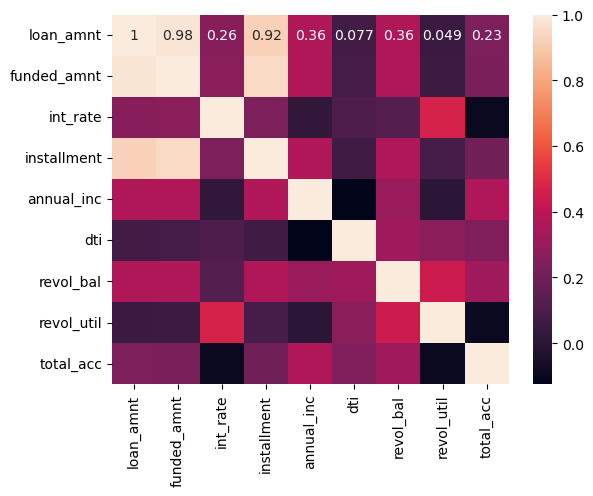

In [283]:
sns.heatmap(corr_matrix,annot=True)

1. Loan amount is having a mildly positive correlation with annual income and revolving balancea
2. Interest rates have a mildly positive correlation with loan amount, debt to income ratio and revolving balance utilization
3. Total account is having a mildly positive correlation with annual income and debt to income ratio


In [284]:
loan_r.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'income_group', 'loan_amnt_cat'],
      dtype='object')